# London Housing Case Project

Problem: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


There are 32 boroughs within Greater London (https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.


Of the tools, techniques, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** 
    - **exploratory data analysis** 
    - **tidying and cleaning** 
    - **transforming DataFrames** 
    - **subsetting DataFrames with lists** 
    - **filtering DataFrames** 
    - **grouping data** 
    - **melting data** 
    - **advanced indexing**
- **matplotlib** 
- **fundamental data types** 
- **dictionaries** 
- **handling dates and times** 
- **function definition** 
- **default arguments, variable length, and scope** 
- **lambda functions and error handling** 

## The Data Science Pipeline

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# First import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
The data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link

# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset I interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, I need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

**2.1. Exploring your data** 

In [3]:
# checking row and columns
properties.shape

(360, 49)

In [4]:
#show the first 5 of data
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


**2.2. Cleaning the data**

In [5]:
# first let's using tranposition to flip the columns into rows to look better
properties_T = properties.T
properties_T.head()

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,840075,831249,810250,813219,808227,754954,750362,719570,692265,670906
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,328266,333303,335559,335794,332826,340826,338083,340295,340932,343528
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,563115,569976,573051,580130,584621,590027,596078,592861,589938,592678
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,394741,395633,396584,396070,400617,401848,406623,408441,408837,406441


In [6]:
#check columns
properties_T.columns

RangeIndex(start=0, stop=360, step=1)

In [7]:
#check index
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [8]:
# Call the .reset_index() method on properties_T to reset the indices, and the reassign the result to properties_T: 
properties_T = properties_T.reset_index()
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,350,351,352,353,354,355,356,357,358,359
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,840075,831249,810250,813219,808227,754954,750362,719570,692265,670906
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,328266,333303,335559,335794,332826,340826,338083,340295,340932,343528
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,563115,569976,573051,580130,584621,590027,596078,592861,589938,592678
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,394741,395633,396584,396070,400617,401848,406623,408441,408837,406441


In [10]:
# the row at index 0 are the time so need to set up to head columns 
properties_T.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,350,351,352,353,354,355,356,357,358,359
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00


In [11]:
# set index 0 to head columns of the data
properties_T.columns = properties_T.iloc[0]

In [12]:
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,840075,831249,810250,813219,808227,754954,750362,719570,692265,670906
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,328266,333303,335559,335794,332826,340826,338083,340295,340932,343528
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,563115,569976,573051,580130,584621,590027,596078,592861,589938,592678
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,394741,395633,396584,396070,400617,401848,406623,408441,408837,406441


In [13]:
# drop the duplicate columns
properties_T = properties_T.drop(0)

In [14]:
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,840075,831249,810250,813219,808227,754954,750362,719570,692265,670906
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,328266,333303,335559,335794,332826,340826,338083,340295,340932,343528
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,563115,569976,573051,580130,584621,590027,596078,592861,589938,592678
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,394741,395633,396584,396070,400617,401848,406623,408441,408837,406441
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,524230,515007,502686,503373,529306,529279,545384,544571,553641,545671


In [15]:
# now timeline year month are on the head columns 
properties_T.columns

Index([       'Unnamed: 0',                 NaT, 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2024-02-01 00:00:00, 2024-03-01 00:00:00, 2024-04-01 00:00:00,
       2024-05-01 00:00:00, 2024-06-01 00:00:00, 2024-07-01 00:00:00,
       2024-08-01 00:00:00, 2024-09-01 00:00:00, 2024-10-01 00:00:00,
       2024-11-01 00:00:00],
      dtype='object', name=0, length=361)

In [16]:
properties_T.index

RangeIndex(start=1, stop=49, step=1)

In [17]:
# rename 'Unnamed: 0' and 'NaT'
properties_T = properties_T.rename(columns = {'Unnamed: 0' : 'London_Borough', pd.NaT : 'ID'})
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,840075,831249,810250,813219,808227,754954,750362,719570,692265,670906
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,328266,333303,335559,335794,332826,340826,338083,340295,340932,343528
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,563115,569976,573051,580130,584621,590027,596078,592861,589938,592678
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,394741,395633,396584,396070,400617,401848,406623,408441,408837,406441
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,524230,515007,502686,503373,529306,529279,545384,544571,553641,545671


**2.3.Transforming the data**

In [19]:
# melt data into new dataFrame 
# representing the average house price within a given month and a given borough.
clean_properties = pd.melt(properties_T, id_vars = ['London_Borough','ID'])
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.2266
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698


In [20]:
# rename '0' and 'value'
clean_properties = clean_properties.rename(columns = {0:'Month', 'value' : 'Average_Price'})
clean_properties.head()

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.2266
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698


In [21]:
# check the types of data
clean_properties.dtypes

London_Borough    object
ID                object
Month             object
Average_Price     object
dtype: object

In [22]:
# Average need to be float value
clean_properties['Average_Price'] = pd.to_numeric(clean_properties['Average_Price'])

In [23]:
# Now Average_Price is Float
clean_properties.dtypes

London_Borough     object
ID                 object
Month              object
Average_Price     float64
dtype: object

In [24]:
# now check the missing value of the data by using count to see the difference
clean_properties.count()

London_Borough    17232
ID                16155
Month             17232
Average_Price     16155
dtype: int64

#### **2.4. Cleaning the data (missing value)**

Check out the contents of the London Borough column, and find null values. 

In [25]:
# check out the unique values of the 'London_Borough' column to see if they're all there.
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [26]:
# check the Unneamed or the named that are not belong to borough
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 34']

,London_Borough,ID,Month,Average_Price
33,Unnamed: 34,NaN,1995-01-01 00:00:00,NaN
81,Unnamed: 34,NaN,1995-02-01 00:00:00,NaN
129,Unnamed: 34,NaN,1995-03-01 00:00:00,NaN
177,Unnamed: 34,NaN,1995-04-01 00:00:00,NaN
225,Unnamed: 34,NaN,1995-05-01 00:00:00,NaN
...,...,...,...,...
17025,Unnamed: 34,NaN,2024-07-01 00:00:00,NaN
17073,Unnamed: 34,NaN,2024-08-01 00:00:00,NaN
17121,Unnamed: 34,NaN,2024-09-01 00:00:00,NaN
17169,Unnamed: 34,NaN,2024-10-01 00:00:00,NaN


In [27]:
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37']

,London_Borough,ID,Month,Average_Price
36,Unnamed: 37,NaN,1995-01-01 00:00:00,NaN
84,Unnamed: 37,NaN,1995-02-01 00:00:00,NaN
132,Unnamed: 37,NaN,1995-03-01 00:00:00,NaN
180,Unnamed: 37,NaN,1995-04-01 00:00:00,NaN
228,Unnamed: 37,NaN,1995-05-01 00:00:00,NaN
...,...,...,...,...
17028,Unnamed: 37,NaN,2024-07-01 00:00:00,NaN
17076,Unnamed: 37,NaN,2024-08-01 00:00:00,NaN
17124,Unnamed: 37,NaN,2024-09-01 00:00:00,NaN
17172,Unnamed: 37,NaN,2024-10-01 00:00:00,NaN


In [28]:
# many rows have NAs as their value for ID. 
# using isna() to check all nan value
clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_Price
33,Unnamed: 34,NaN,1995-01-01 00:00:00,NaN
36,Unnamed: 37,NaN,1995-01-01 00:00:00,NaN
46,Unnamed: 47,NaN,1995-01-01 00:00:00,NaN
81,Unnamed: 34,NaN,1995-02-01 00:00:00,NaN
84,Unnamed: 37,NaN,1995-02-01 00:00:00,NaN
...,...,...,...,...
17172,Unnamed: 37,NaN,2024-10-01 00:00:00,NaN
17182,Unnamed: 47,NaN,2024-10-01 00:00:00,NaN
17217,Unnamed: 34,NaN,2024-11-01 00:00:00,NaN
17220,Unnamed: 37,NaN,2024-11-01 00:00:00,NaN


In [30]:
# There are 1077 rows of NAN value
# using notna() that will show the columns and rows that are not nan value
NAN1 = clean_properties[clean_properties['ID'].notna()]
NAN1.head(23)

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.22660
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698
5,Bromley,E09000006,1995-01-01 00:00:00,81671.47692
6,Camden,E09000007,1995-01-01 00:00:00,120932.88810
7,Croydon,E09000008,1995-01-01 00:00:00,69158.16225
8,Ealing,E09000009,1995-01-01 00:00:00,79885.89069
9,Enfield,E09000010,1995-01-01 00:00:00,72514.69096


In [32]:
# let's try dropna() to deleted all the nan values
NAN2 = clean_properties.dropna()
NAN2.head(23)

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.22660
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698
5,Bromley,E09000006,1995-01-01 00:00:00,81671.47692
6,Camden,E09000007,1995-01-01 00:00:00,120932.88810
7,Croydon,E09000008,1995-01-01 00:00:00,69158.16225
8,Ealing,E09000009,1995-01-01 00:00:00,79885.89069
9,Enfield,E09000010,1995-01-01 00:00:00,72514.69096


In [34]:
# check the size how difference of each dataFrame
print(clean_properties.shape)
print(NAN1.shape)
print(NAN2.shape)

(17232, 4)
(16155, 4)
(16155, 4)


Go drop the rest of the invalid 'London Borough' values.

An elegant way to do this is to make a list of all those invalid values, then use the isin() method, combined with the negation operator ~, to remove those values. Call this list nonBoroug into NON_Bs.

In [36]:
# call unique of London_Borough
NAN2['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [37]:
# A list of non-boroughs. 
NON_B = [
    'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'
]

In [38]:
# first check that Non-boroughs are in London
NAN2[NAN2.London_Borough.isin(NON_B)]

,London_Borough,ID,Month,Average_Price
34,Inner London,E13000001,1995-01-01 00:00:00,78251.97650
35,Outer London,E13000002,1995-01-01 00:00:00,72958.79836
37,NORTH EAST,E12000001,1995-01-01 00:00:00,42076.35411
38,NORTH WEST,E12000002,1995-01-01 00:00:00,43958.48001
39,YORKS & THE HUMBER,E12000003,1995-01-01 00:00:00,44803.42878
...,...,...,...,...
17226,EAST OF ENGLAND,E12000006,2024-11-01 00:00:00,339560.00000
17227,LONDON,E12000007,2024-11-01 00:00:00,511279.00000
17228,SOUTH EAST,E12000008,2024-11-01 00:00:00,377822.00000
17229,SOUTH WEST,E12000009,2024-11-01 00:00:00,317608.00000


In [40]:
# using ~  to get just those rows whose values for London_Borough is not in the nonBoroughs list
NAN2[~NAN2.London_Borough.isin(NON_B)]

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.22660
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698
...,...,...,...,...
17212,Sutton,E09000029,2024-11-01 00:00:00,445386.00000
17213,Tower Hamlets,E09000030,2024-11-01 00:00:00,472406.00000
17214,Waltham Forest,E09000031,2024-11-01 00:00:00,503829.00000
17215,Wandsworth,E09000032,2024-11-01 00:00:00,598912.00000


In [41]:
NAN2 = NAN2[~NAN2.London_Borough.isin(NON_B)]

In [42]:
NAN2.head()

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.22660
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698


In [43]:
# Make a new variable called simply df
df = NAN2
df.head()

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.22660
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698


In [44]:
df.dtypes

London_Borough     object
ID                 object
Month              object
Average_Price     float64
dtype: object

In [45]:
df.count()

London_Borough    11847
ID                11847
Month             11847
Average_Price     11847
dtype: int64

**2.5. Visualizing the data**

To visualize the data, let's subset on a particular London Borough and do a line plot of Month against Average Price

Let's observations to Camden for now.

C:\Users\oouje\anaconda3\envs\AJ\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Text(0, 0.5, 'Price')

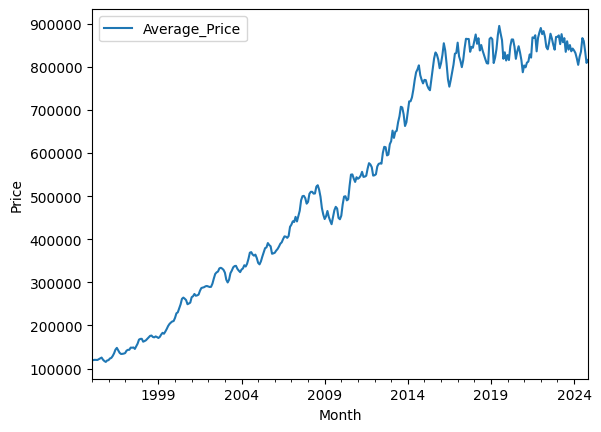

In [46]:
# First of all, make a variable called camden
# assign it the result of filtering df
camden = df[df['London_Borough'] == 'Camden']

# Make a variable called ax
#Assign it the result of calling the plot() method , using line plot
ax = camden.plot(kind = 'line', x = 'Month', y = 'Average_Price')

# then call the set_ylabel() method on ax, and set that label to the string: 'Price'
ax.set_ylabel('Price')

To this end, apply a ***lambda function***.
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 


In [48]:
# create new columns 'year'
df['year'] = df['Month'].apply(lambda t : t.year)
df.tail()

,London_Borough,ID,Month,Average_Price,year
17212,Sutton,E09000029,2024-11-01 00:00:00,445386.0,2024
17213,Tower Hamlets,E09000030,2024-11-01 00:00:00,472406.0,2024
17214,Waltham Forest,E09000031,2024-11-01 00:00:00,503829.0,2024
17215,Wandsworth,E09000032,2024-11-01 00:00:00,598912.0,2024
17216,Westminster,E09000033,2024-11-01 00:00:00,865858.0,2024


In [49]:
# using groupby to calculate the mean house price for each year and for each Borough
# group of London and year

# using mean() to get the average of values
dfg = df.groupby(by = ['London_Borough','year']).mean(numeric_only = True)

In [51]:
dfg.sample(10)

,,Average_Price
London_Borough,year,
Southwark,1997,79725.850140
Greenwich,2017,391749.944825
Southwark,2000,142266.729008
Newham,2015,297558.141833
Hillingdon,1996,75753.415728
Sutton,1995,70291.304638
Newham,2010,204466.989842
Richmond upon Thames,2004,316540.906067
Tower Hamlets,2016,457129.597725


In [52]:
# making data dfg have index by using reset_index()
dfg = dfg.reset_index()
dfg.head()

,London_Borough,year,Average_Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


### 3. Modeling
Create a function that will calculate a ratio of house prices, that compares the price of a house in 2018 to the price in 1998. 

1. Get the Average Price for that borough for 1998 and, seperately, for 2018. 

2. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018. 

3. Return that ratio. 


In [53]:
# create function called 'create_ratio'
def create_ratio(d):
    y1998 = float(d['Average_Price'][d['year'] == 1998])
    y2018 = float(d['Average_Price'][d['year'] == 2018])
    ratio = [y1998 / y2018]
    return ratio

In [55]:
# Test out the function by calling it with the following argument
create_ratio(dfg[dfg['London_Borough'] == 'Barking & Dagenham'])

C:\Users\oouje\AppData\Local\Temp\ipykernel_36584\986483911.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998 = float(d['Average_Price'][d['year'] == 1998])
C:\Users\oouje\AppData\Local\Temp\ipykernel_36584\986483911.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2018 = float(d['Average_Price'][d['year'] == 2018])


[0.2042305517789531]

In [56]:
# loop all of the London Boroughs
# make an empty dictionary
final = {}

# using for loop
# Call the iterator variable 'b'
for b in dfg['London_Borough'].unique():
    # Let's make our parameter to our create_price_ratio function
    borough = dfg[dfg['London_Borough'] == b]
    # Make a new entry in the final dictionary whose value's the result of calling create_price_ratio with the argument
    final[b] = create_ratio(borough)

# then we use function
print(final)

{'Barking & Dagenham': [0.2042305517789531], 'Barnet': [0.22947444714139664], 'Bexley': [0.23530326956746084], 'Brent': [0.20427076722400112], 'Bromley': [0.24420945118598184], 'Camden': [0.20267350201601633], 'City of London': [0.18858586525673998], 'Croydon': [0.23803943067256167], 'Ealing': [0.2319231929467808], 'Enfield': [0.23459043566245952], 'Greenwich': [0.2099267632074863], 'Hackney': [0.16133361584589345], 'Hammersmith & Fulham': [0.24160777417877788], 'Haringey': [0.19475892515252136], 'Harrow': [0.24635696011145083], 'Havering': [0.2311674243025625], 'Hillingdon': [0.2380791298036054], 'Hounslow': [0.25144117659399684], 'Islington': [0.20653143718863254], 'Kensington & Chelsea': [0.19676616601314997], 'Kingston upon Thames': [0.23419000399105977], 'Lambeth': [0.20168631676941154], 'Lewisham': [0.18355656115206362], 'Merton': [0.21074143727135689], 'Newham': [0.18840708833606373], 'Redbridge': [0.22370414627844573], 'Richmond upon Thames': [0.24982762338287168], 'Southwark':

C:\Users\oouje\AppData\Local\Temp\ipykernel_36584\986483911.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998 = float(d['Average_Price'][d['year'] == 1998])
C:\Users\oouje\AppData\Local\Temp\ipykernel_36584\986483911.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2018 = float(d['Average_Price'][d['year'] == 2018])


In [57]:
final

{'Barking & Dagenham': [0.2042305517789531],
 'Barnet': [0.22947444714139664],
 'Bexley': [0.23530326956746084],
 'Brent': [0.20427076722400112],
 'Bromley': [0.24420945118598184],
 'Camden': [0.20267350201601633],
 'City of London': [0.18858586525673998],
 'Croydon': [0.23803943067256167],
 'Ealing': [0.2319231929467808],
 'Enfield': [0.23459043566245952],
 'Greenwich': [0.2099267632074863],
 'Hackney': [0.16133361584589345],
 'Hammersmith & Fulham': [0.24160777417877788],
 'Haringey': [0.19475892515252136],
 'Harrow': [0.24635696011145083],
 'Havering': [0.2311674243025625],
 'Hillingdon': [0.2380791298036054],
 'Hounslow': [0.25144117659399684],
 'Islington': [0.20653143718863254],
 'Kensington & Chelsea': [0.19676616601314997],
 'Kingston upon Thames': [0.23419000399105977],
 'Lambeth': [0.20168631676941154],
 'Lewisham': [0.18355656115206362],
 'Merton': [0.21074143727135689],
 'Newham': [0.18840708833606373],
 'Redbridge': [0.22370414627844573],
 'Richmond upon Thames': [0.249827

In [58]:
# Make a variable called df_ratios, and assign it the result of calling the DataFrame method on the dictionary final.
df_ratios = pd.DataFrame(final)
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.204231,0.229474,0.235303,0.204271,0.244209,0.202674,0.188586,0.238039,0.231923,0.23459,...,0.210741,0.188407,0.223704,0.249828,0.181279,0.242785,0.216135,0.171376,0.210191,0.186821


In [59]:
# now let's transpose the df_ratios
df_ratios_T = df_ratios.T

# set index for columns
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,0.204231
1,Barnet,0.229474
2,Bexley,0.235303
3,Brent,0.204271
4,Bromley,0.244209


In [60]:
# rename the 'index' column as 'London_Borough', and the '0' column to '2018'
df_ratios.rename(columns = {'index': 'Borough', 0 : '2018'}, inplace = True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,0.204231
1,Barnet,0.229474
2,Bexley,0.235303
3,Brent,0.204271
4,Bromley,0.244209


In [61]:
# sort in descending order and select the top 15 boroughs.
# Make a variable called top15, and assign it the result of calling sort_values() on df_ratios.
top15 = df_ratios.sort_values(by = '2018', ascending = False).head(15)
print(top15)

                 Borough      2018
17              Hounslow  0.251441
26  Richmond upon Thames  0.249828
14                Harrow  0.246357
4                Bromley  0.244209
28                Sutton  0.242785
12  Hammersmith & Fulham  0.241608
16            Hillingdon  0.238079
7                Croydon  0.238039
2                 Bexley  0.235303
9                Enfield  0.234590
20  Kingston upon Thames  0.234190
8                 Ealing  0.231923
15              Havering  0.231167
1                 Barnet  0.229474
25             Redbridge  0.223704


[Text(0, 0, 'Hounslow'),
 Text(1, 0, 'Richmond upon Thames'),
 Text(2, 0, 'Harrow'),
 Text(3, 0, 'Bromley'),
 Text(4, 0, 'Sutton'),
 Text(5, 0, 'Hammersmith & Fulham'),
 Text(6, 0, 'Hillingdon'),
 Text(7, 0, 'Croydon'),
 Text(8, 0, 'Bexley'),
 Text(9, 0, 'Enfield'),
 Text(10, 0, 'Kingston upon Thames'),
 Text(11, 0, 'Ealing'),
 Text(12, 0, 'Havering'),
 Text(13, 0, 'Barnet'),
 Text(14, 0, 'Redbridge')]

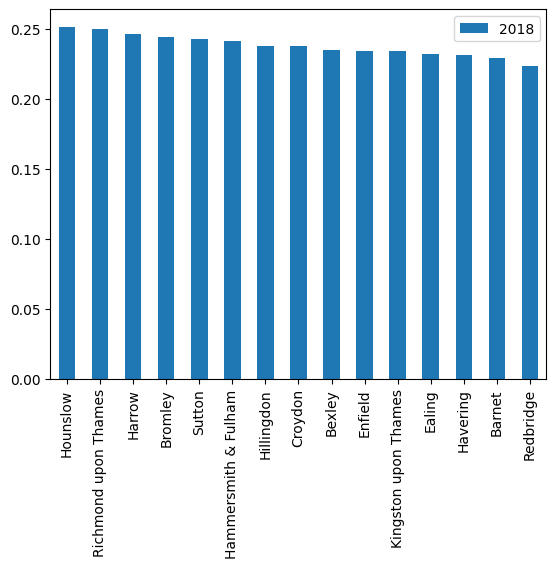

In [62]:
# Let's plot the boroughs that have seen the greatest changes in price.
# Make a variable called ax. Assign it the result of filtering top15 on 'Borough' and '2018', then calling plot()
# using set_xticklabels for nemed each bar all of the borough
ax = top15[['Borough','2018']].plot(kind = 'bar')
ax.set_xticklabels(top15.Borough)